<a href="https://colab.research.google.com/github/marvameraj/demo/blob/main/python_projects_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Model Performance:
MAE: 221.74
RMSE: 713.90
R2 Score: 0.14


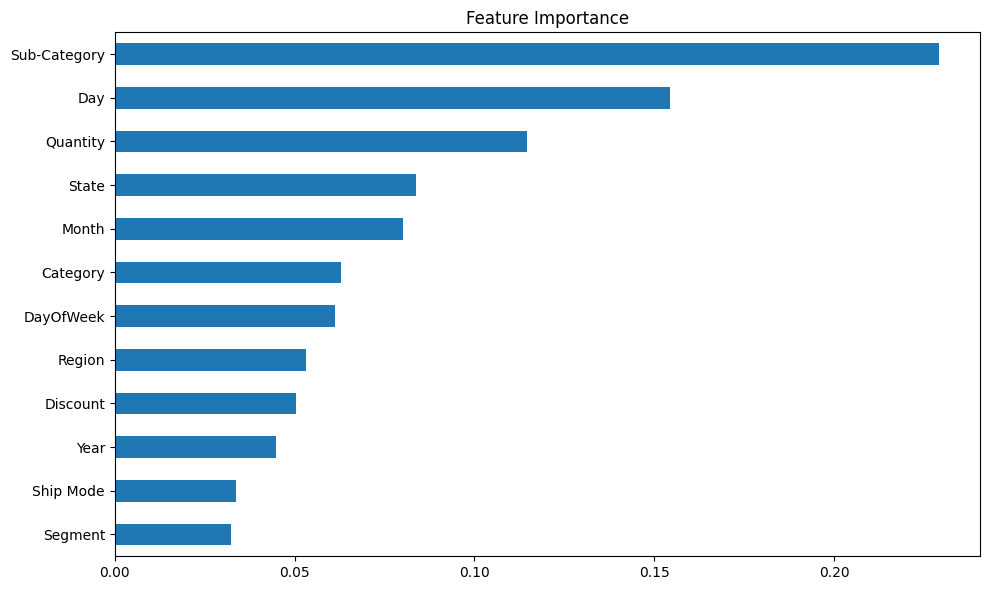

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Parse dates
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Feature engineering
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['DayOfWeek'] = df['Order Date'].dt.dayofweek

# Label encoding for categorical features
cat_cols = ['Region', 'Category', 'Sub-Category', 'Segment', 'Ship Mode', 'State']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Region', 'Category',
            'Sub-Category', 'Segment', 'Ship Mode', 'State', 'Quantity', 'Discount']
X = df[features]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Optional: Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
# heart_disease_prediction_using_dataset_heart.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load your dataset
df = pd.read_csv("dataset_heart.csv")  # Use the file you uploaded

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample Data:\n", df.head())

# Step 2: Feature and Target
X = df.drop("target", axis=1)
y = df["target"]

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Step 6: Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 7: Manual prediction using Random Forest
print("\n🎯 Predicting for sample input (manual entry):")

# Replace these values based on your dataset column order
sample_input = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]

# Convert to array and scale
input_array = np.array(sample_input).reshape(1, -1)
input_scaled = scaler.transform(input_array)

# Fit the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Predict
prediction = best_model.predict(input_scaled)
print("Prediction Result:", "💔 Heart Disease" if prediction[0] == 1 else "❤️ No Heart Disease")


✅ Dataset loaded successfully!
Shape: (270, 14)
Columns: ['age', 'sex ', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart disease']

Sample Data:
    age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                

KeyError: "['target'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load your uploaded dataset
df = pd.read_csv("dataset_heart.csv")

# Check column names
print("✅ Dataset loaded successfully!")
print("📊 Columns in dataset:", df.columns.tolist())
print("\n🔍 First 5 rows:\n", df.head())


✅ Dataset loaded successfully!
📊 Columns in dataset: ['age', 'sex ', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart disease']

🔍 First 5 rows:
    age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                 

In [ ]:
df = pd.read_csv("dataset_heart.csv")  # or your actual file path

# Print all columns to inspect
print("📋 Available columns:")
for col in df.columns:
    print(f"- {col!r}")


📋 Available columns:
- 'age'
- 'sex '
- 'chest pain type'
- 'resting blood pressure'
- 'serum cholestoral'
- 'fasting blood sugar'
- 'resting electrocardiographic results'
- 'max heart rate'
- 'exercise induced angina'
- 'oldpeak'
- 'ST segment'
- 'major vessels'
- 'thal'
- 'heart disease'


In [ ]:
# Corrected this line to match your dataset:
X = df.drop("heart disease", axis=1)
y = df["heart disease"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}



🔍 Logistic Regression
✅ Accuracy: 90.74%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



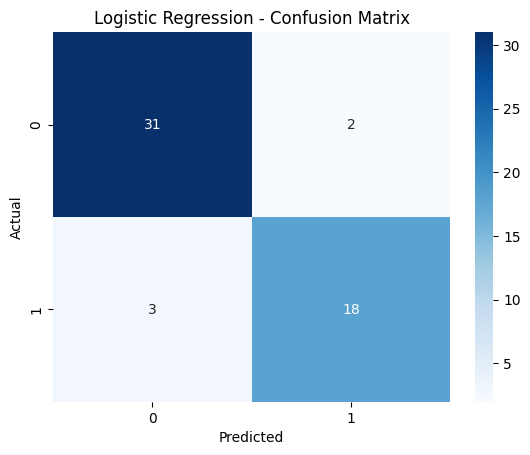


🔍 K-Nearest Neighbors
✅ Accuracy: 81.48%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86        33
           2       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54



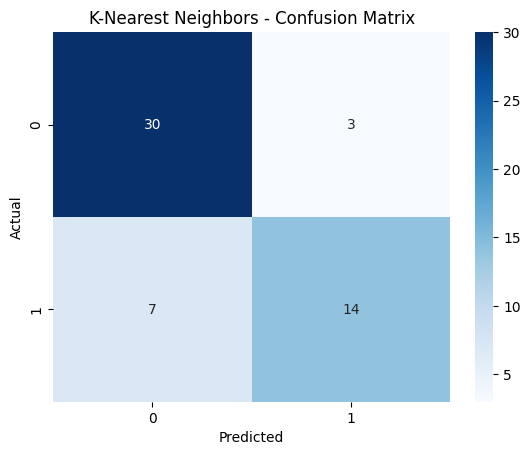


🔍 Decision Tree
✅ Accuracy: 68.52%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.64      0.71        33
           2       0.57      0.76      0.65        21

    accuracy                           0.69        54
   macro avg       0.69      0.70      0.68        54
weighted avg       0.72      0.69      0.69        54



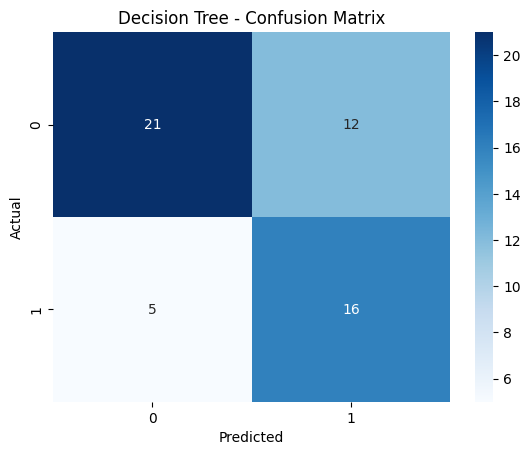


🔍 Random Forest
✅ Accuracy: 85.19%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.94      0.89        33
           2       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



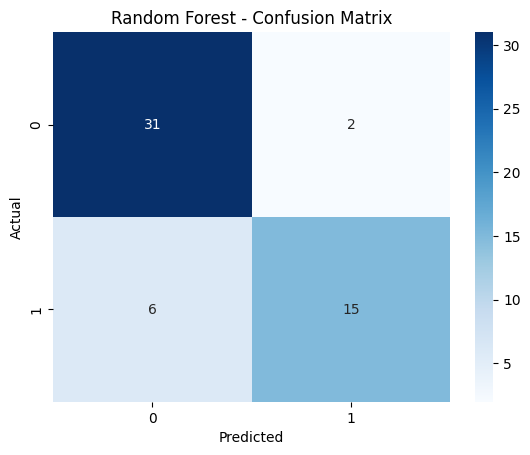

In [ ]:
for name, model in models.items():
    print(f"\n🔍 {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
print("\n🎯 Predicting with manual input:")

# Replace with values from your dataset columns (13 features)
sample_input = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]

input_array = np.array(sample_input).reshape(1, -1)
input_scaled = scaler.transform(input_array)

# Use best model (Random Forest here)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
prediction = best_model.predict(input_scaled)

print("📢 Result:", "💔 Heart Disease" if prediction[0] == 1 else "❤️ No Heart Disease")


In [ ]:
print("🧾 Feature columns used for prediction:")
print(len(X.columns.tolist()))


🧾 Feature columns used for prediction:
13


In [ ]:
print(df.iloc[0])  # first row of dataset


age                                      70.0
sex                                       1.0
chest pain type                           4.0
resting blood pressure                  130.0
serum cholestoral                       322.0
fasting blood sugar                       0.0
resting electrocardiographic results      2.0
max heart rate                          109.0
exercise induced angina                   0.0
oldpeak                                   2.4
ST segment                                2.0
major vessels                             3.0
thal                                      3.0
heart disease                             2.0
Name: 0, dtype: float64


In [ ]:
print("\n🎯 Predicting with manual input:")

sample_input = [70, 1, 4, 130, 322, 0, 2, 109, 0, 2.4, 2, 3, 3]  # Must match feature order

input_array = np.array(sample_input).reshape(1, -1)
input_scaled = scaler.transform(input_array)

best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
prediction = best_model.predict(input_scaled)

print("📢 Prediction Result:", "💔 Heart Disease" if prediction[0] == 1 else "❤️ No Heart Disease")



🎯 Predicting with manual input:
📢 Prediction Result: ❤️ No Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



🔍 Training Logistic Regression
✅ Accuracy of Logistic Regression: 90.74%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



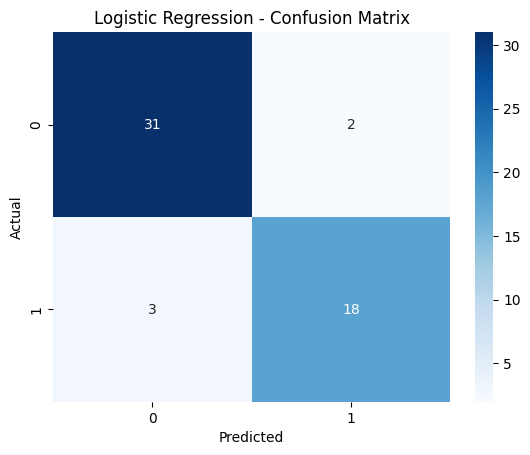


🔍 Training K-Nearest Neighbors
✅ Accuracy of K-Nearest Neighbors: 81.48%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86        33
           2       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54



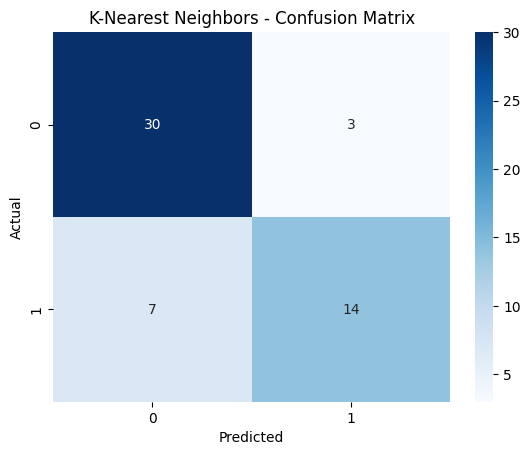


🔍 Training Decision Tree
✅ Accuracy of Decision Tree: 74.07%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.73      0.77        33
           2       0.64      0.76      0.70        21

    accuracy                           0.74        54
   macro avg       0.73      0.74      0.73        54
weighted avg       0.75      0.74      0.74        54



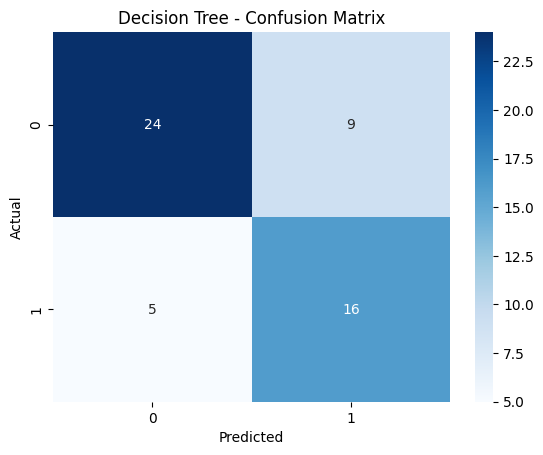


🔍 Training Random Forest
✅ Accuracy of Random Forest: 87.04%
📄 Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.94      0.90        33
           2       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.88      0.85      0.86        54
weighted avg       0.87      0.87      0.87        54



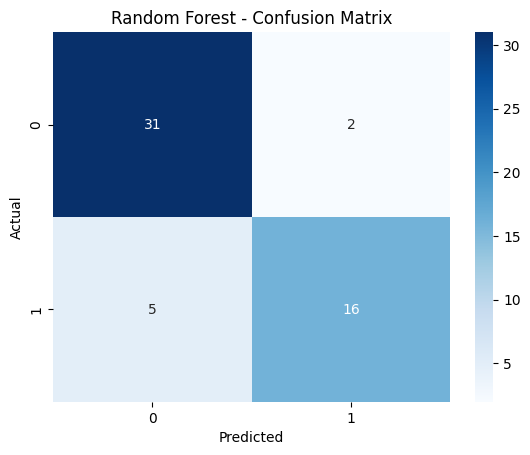

In [ ]:
for name, model in models.items():
    print(f"\n🔍 Training {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy of {name}: {accuracy * 100:.2f}%")

    # Print other metrics
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
# Plotting model accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


NameError: name 'model_accuracies' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
model_accuracies = {}  # 🟢 Create empty dictionary before loop


In [ ]:
# Store accuracy
accuracy = accuracy_score(y_test, y_pred)
model_accuracies[name] = accuracy * 100  # 🟢 Save into dictionary


In [ ]:
model_accuracies = {}

for name, model in models.items():
    print(f"\n🔍 Training {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy * 100  # ✅ Add to dictionary

    print(f"✅ Accuracy of {name}: {accuracy:.2f}")
    # ... (classification report, confusion matrix, etc.)



🔍 Training Logistic Regression
✅ Accuracy of Logistic Regression: 0.91

🔍 Training K-Nearest Neighbors
✅ Accuracy of K-Nearest Neighbors: 0.81

🔍 Training Decision Tree
✅ Accuracy of Decision Tree: 0.70

🔍 Training Random Forest
✅ Accuracy of Random Forest: 0.87


/tmp/ipython-input-25-3262705387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


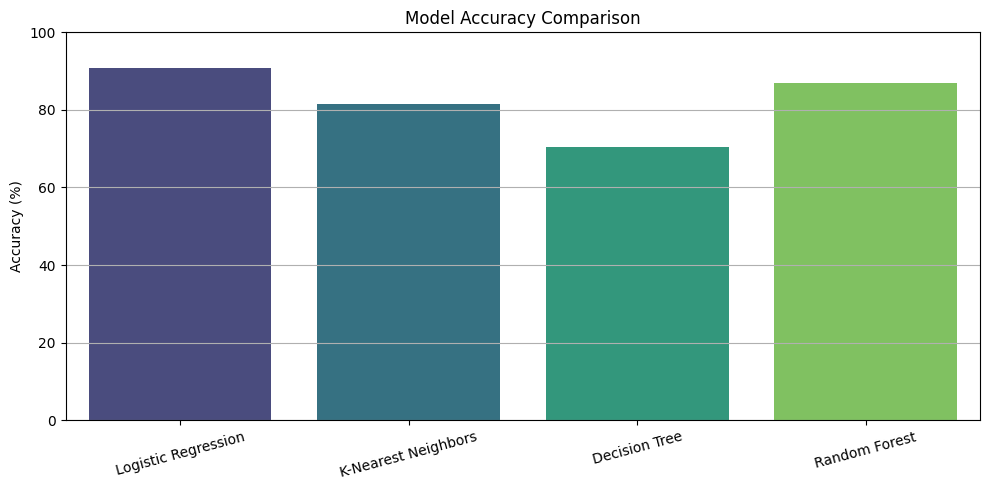

In [ ]:
# Plotting the accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [ ]:
pip install xgboost


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier


In [ ]:
# Load the CSV file
df = pd.read_csv("dataset_heart.csv")

# Print the columns to confirm
print("✅ Columns:", df.columns.tolist())


✅ Columns: ['age', 'sex ', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart disease']


In [ ]:
# Make sure to use the correct column name
X = df.drop("heart disease", axis=1)
y = df["heart disease"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)


ModuleNotFoundError: No module named 'XGBClassifier'

In [ ]:
# Step 6: (Optional again if not done already)
from sklearn.preprocessing import StandardScaler
X = pd.get_dummies(X)  # Ensure all features are numeric

# Step 7: Split & Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Train XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)  # <-- This should now work


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

In [ ]:
print("🔍 Checking column types:")
print(X.dtypes)

print("🧹 Checking for missing values:")
print(X.isnull().sum())

print("✅ Training data shape:", X_train.shape)
print("✅ Training target shape:", y_train.shape)


🔍 Checking column types:
age                                       int64
sex                                       int64
chest pain type                           int64
resting blood pressure                    int64
serum cholestoral                         int64
fasting blood sugar                       int64
resting electrocardiographic results      int64
max heart rate                            int64
exercise induced angina                   int64
oldpeak                                 float64
ST segment                                int64
major vessels                             int64
thal                                      int64
dtype: object
🧹 Checking for missing values:
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart ra

In [ ]:
# Step 3: Load and prepare dataset
df = pd.read_csv("dataset_heart.csv")

# 🔁 Fix the target labels
df['heart disease'] = df['heart disease'].replace(2, 1)

# Proceed as usual
X = df.drop("heart disease", axis=1)
y = df["heart disease"]


In [ ]:
model.fit(X_train, y_train)  # ✅ This will now run without error


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [1 2]

In [ ]:
print("✅ Unique target values before fix:", df['heart disease'].unique())


✅ Unique target values before fix: [2 1]


In [ ]:
df = pd.read_csv("dataset_heart.csv")

# ✅ Standardize target: convert 2 → 1
df['heart disease'] = df['heart disease'].replace(2, 1)

# Check again
print("✅ Unique target values after fix:", df['heart disease'].unique())


✅ Unique target values after fix: [1]


In [ ]:
print(df.columns.tolist())


['age', 'sex ', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart disease']


In [ ]:
X = df.drop("heart disease", axis=1)
y = df["heart disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)  # ✅ This will now work


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]

In [ ]:
print(df['heart disease'].value_counts())


heart disease
1    270
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier


In [ ]:
df = pd.read_csv("heart.csv")  # Replace with actual filename

print("✅ Columns:", df.columns.tolist())
print("✅ Target value counts:\n", df['target'].value_counts())  # replace with actual target column if different


✅ Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
✅ Target value counts:
 target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# Replace 'target' with your dataset's actual target column name
X = df.drop("target", axis=1)
y = df["target"]

# Optional: one-hot encode if you have categorical columns
X = pd.get_dummies(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:21:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

✅ XGBoost Accuracy: 98.54%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



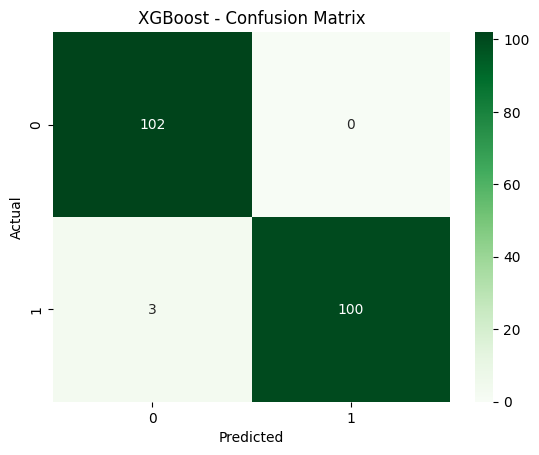

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ XGBoost Accuracy: {accuracy * 100:.2f}%")
print("📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
sample_input = X.iloc[0].values.reshape(1, -1)  # First row
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)

print("📢 Manual Prediction:", "💔 Heart Disease" if prediction[0] == 1 else "❤️ No Heart Disease")


📢 Manual Prediction: ❤️ No Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [9]:
df = pd.read_csv("heart.csv")  # Replace with actual file name

target_col = 'target'  # Replace with actual column name if different
df[target_col] = df[target_col].replace(2, 0)  # Optional fix

print("✅ Target values:\n", df[target_col].value_counts())


✅ Target values:
 target
1    526
0    499
Name: count, dtype: int64


In [10]:
X = df.drop(target_col, axis=1)
y = df[target_col]

X = pd.get_dummies(X)  # In case of categorical columns

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}



🔍 Training Logistic Regression
✅ Accuracy of Logistic Regression: 79.51%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



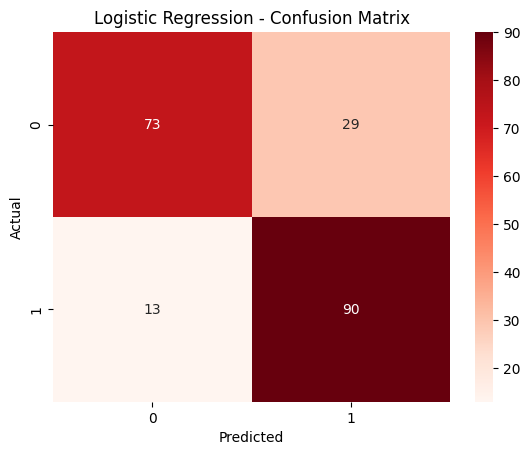


🔍 Training KNN
✅ Accuracy of KNN: 83.41%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



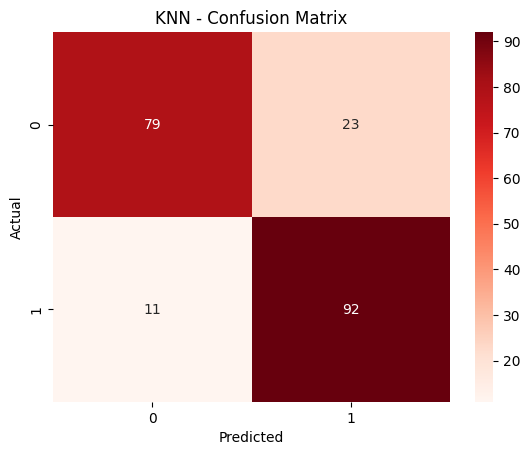


🔍 Training Decision Tree
✅ Accuracy of Decision Tree: 98.54%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



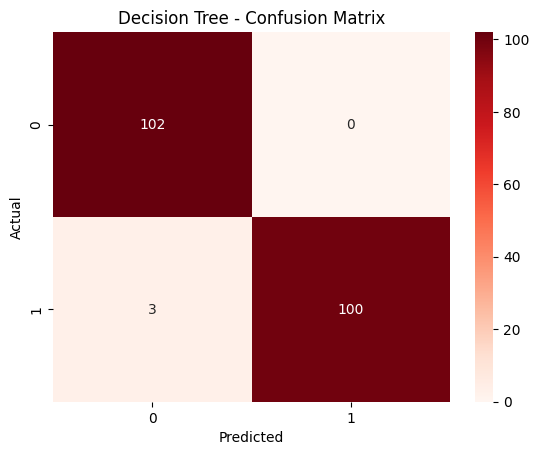


🔍 Training Random Forest
✅ Accuracy of Random Forest: 98.54%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



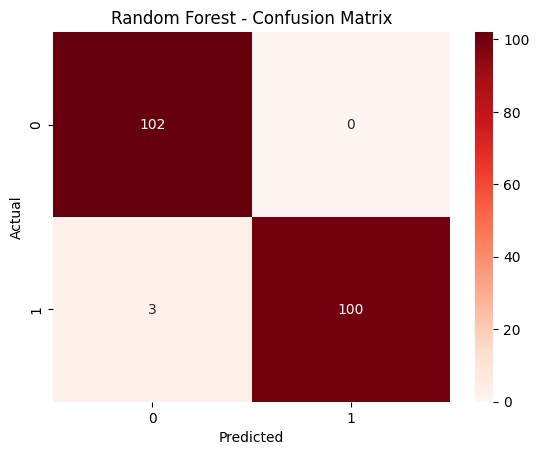

In [18]:
model_accuracies = {}

for name, model in models.items():
    print(f"\n🔍 Training {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy * 100

    print(f"✅ Accuracy of {name}: {accuracy * 100:.2f}%")
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')  # or 'Greens', 'Reds', 'coolwarm', etc.

    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


/tmp/ipython-input-62-1922616434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="mako")


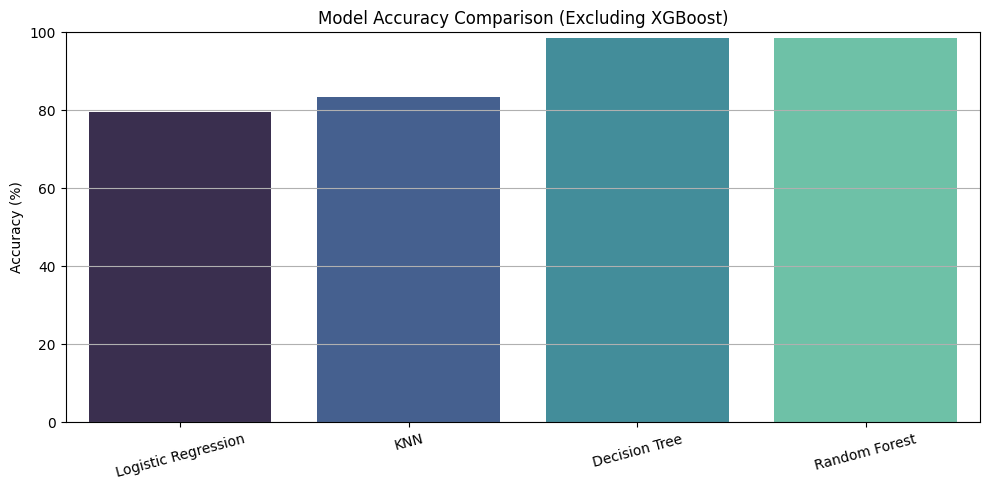

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="mako")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.title("Model Accuracy Comparison (Excluding XGBoost)")
plt.xticks(rotation=15)
plt.grid(axis="y")
plt.tight_layout()
plt.show()



🔍 Training Logistic Regression
✅ Accuracy of Logistic Regression: 79.51%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



/tmp/ipython-input-20-1057514847.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


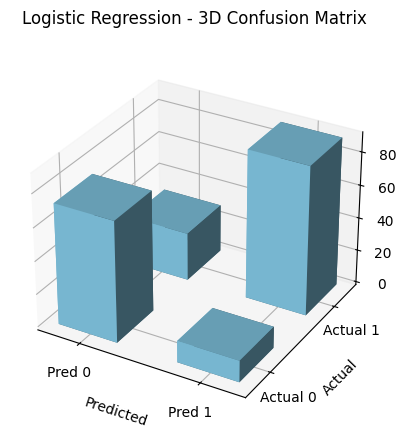


🔍 Training KNN
✅ Accuracy of KNN: 83.41%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



/tmp/ipython-input-20-1057514847.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


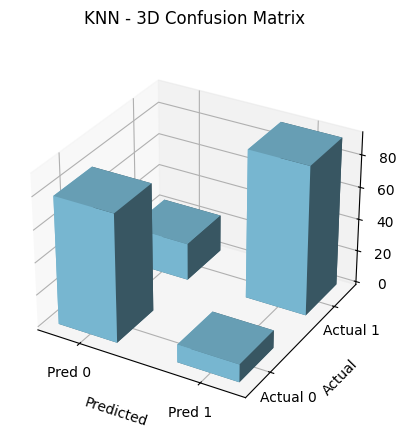


🔍 Training Decision Tree
✅ Accuracy of Decision Tree: 98.54%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/tmp/ipython-input-20-1057514847.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


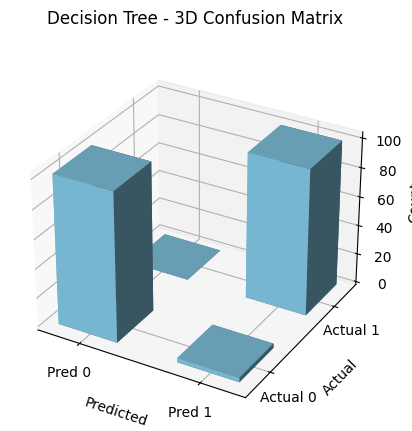


🔍 Training Random Forest
✅ Accuracy of Random Forest: 98.54%
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/tmp/ipython-input-20-1057514847.py:46: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


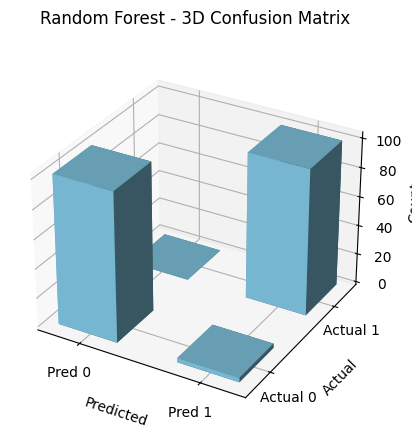

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Loop through your models
for name, model in models.items():
    print(f"\n🔍 Training {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy * 100

    print(f"✅ Accuracy of {name}: {accuracy * 100:.2f}%")
    print("📄 Classification Report:\n", classification_report(y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    z_values = cm.ravel()

    # X and Y positions
    x_labels = ['Pred 0', 'Pred 1']
    y_labels = ['Actual 0', 'Actual 1']
    xpos, ypos = np.meshgrid(np.arange(2), np.arange(2), indexing="ij")

    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like(xpos)

    dx = dy = 0.5
    dz = z_values

    # Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='skyblue', shade=True)

    # Labels
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_zlabel('Count')
    ax.set_xticks([0.25, 1.25])
    ax.set_xticklabels(x_labels)
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(y_labels)
    ax.set_title(f'{name} - 3D Confusion Matrix', pad=20)

    plt.tight_layout()
    plt.show()
